<a href="https://colab.research.google.com/github/Celinekimm/DeepLearning_Mnist/blob/main/DeepLearning_Mnist(convolution).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import numpy as np
import os
import tensorflow as tf

# seed value
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(3)

# MNIST dataset load
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# Convolution layer
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model optimization
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# Running the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])

# Check the test accuracy
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# Check the test loss
y_vloss = history.history['val_loss']

# Check the train loss
y_loss = history.history['loss']


Epoch 1: val_loss improved from inf to 0.05400, saving model to ./model/01-0.0540.hdf5

Epoch 2: val_loss improved from 0.05400 to 0.03983, saving model to ./model/02-0.0398.hdf5

Epoch 3: val_loss improved from 0.03983 to 0.03979, saving model to ./model/03-0.0398.hdf5

Epoch 4: val_loss improved from 0.03979 to 0.03166, saving model to ./model/04-0.0317.hdf5

Epoch 5: val_loss did not improve from 0.03166

Epoch 6: val_loss improved from 0.03166 to 0.03042, saving model to ./model/06-0.0304.hdf5

Epoch 7: val_loss did not improve from 0.03042

Epoch 8: val_loss did not improve from 0.03042

Epoch 9: val_loss did not improve from 0.03042

Epoch 10: val_loss improved from 0.03042 to 0.02834, saving model to ./model/10-0.0283.hdf5

Epoch 11: val_loss improved from 0.02834 to 0.02668, saving model to ./model/11-0.0267.hdf5

Epoch 12: val_loss did not improve from 0.02668

Epoch 13: val_loss improved from 0.02668 to 0.02622, saving model to ./model/13-0.0262.hdf5

Epoch 14: val_loss did 

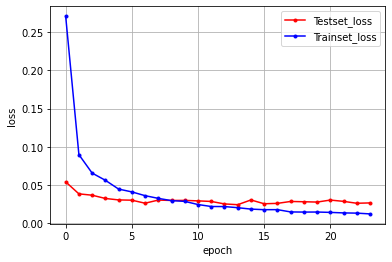

In [21]:
# Visualising 
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()